- ****
- **Prepared by Preetish**


Work Division :-
1. Model fitting & Training
2. visualization
3. Testing
4. Documentation





---

### Contents

|S.No|Section|
|----|-------|
|1.|About the Dataset|
|2.|Visualization|
|3.|Fitting all Features|
|4.|Splitting dataset|
|5.|Boxplots|
|6.|Outlier Removal|
|7.|Male & Female Model|
|8.|P & N comparison|
|9.|Side-by-side Plots|
|10.|Problems & Weaknesses|
|11.|Summary|
|12.|References|

---

### About the dataset

**ILPD (Indian Liver Patient Dataset)**

- Contains 584 patient records collected from the NorthEast of Andhra Pradesh, India.
- The prediction task is to determine whether a patient suffers from liver disease based on the information about several biochemical markers, including albumin and other enzymes required for metabolism.
- Of the 583 patient records, 441 are male, and 142 are female.

Columns

1. Age: Age of the patient (in years). Note that any patient whose age exceeds 89 is listed as being of age “90.”
2. Gender: Gender of the patient (male or female).
3. Total Bilirubin (TB): A measure of bilirubin concentration in the blood.
4. Direct Bilirubin (DB): A specific type of bilirubin.
5. Total Proteins (TP): Total protein levels in the blood.
6. Albumin (ALB): A protein synthesized by the liver.
7. Albumin and Globulin Ratio (A/G Ratio): The ratio of albumin to globulin.
8. Alkaline Phosphatase (Alkphos): An enzyme related to liver function.
9. Alanine Aminotransferase (SGPT): Another liver enzyme.
10. Aspartate Aminotransferase (SGOT): Yet another liver enzyme.

---

1. Model used: Decision tree classifier
2. P_N column is the target column which contains values 1 or 2. We have converted 1 to P for Positive and 2 to N for Negative

---

### Visualization

1. Age distribution

In [ ]:
from random import randint
import pandas as pd
import math
import random
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def prep_dataset():
    dataset = pd.read_csv('ILPD.csv')
    dataset.dropna(inplace=True)
    dataset['P_N'] = dataset['P_N'].replace({1: 'P', 2: 'N'})
    print("Dataset is ready. Here  is a random sample of 3")
    print(dataset.sample(3))
    return dataset

In [ ]:
dataset=prep_dataset()

Dataset is ready. Here  is a random sample of 3
     Age Gender    TB    DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio P_N
503   53   Male  19.8  10.4      238    39   221  8.1  2.5        0.4   P
559   26   Male  42.8  19.7      390    75   138  7.5  2.6        0.5   P
140   60   Male   0.6   0.1      186    20    21  6.2  3.3        1.1   N


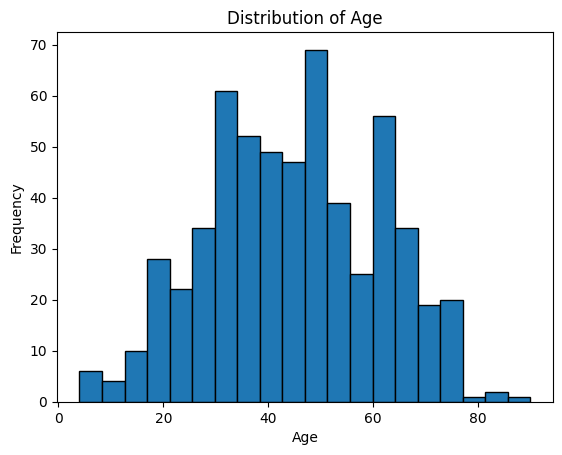

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.hist(dataset['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

2. Gender Distribution

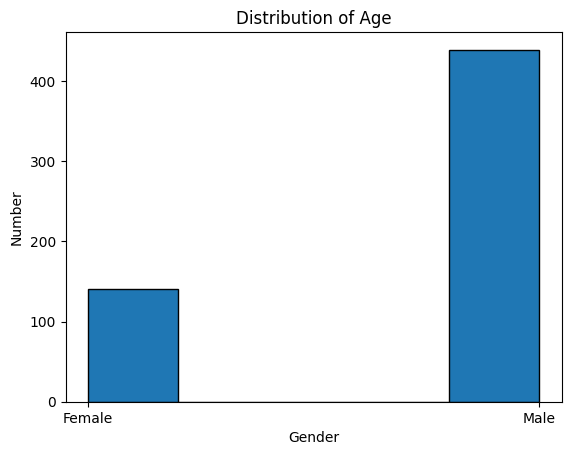

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.hist(dataset['Gender'], bins=5, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Gender')
plt.ylabel('Number')
plt.show()

The dataset has more Male data samples than female.
1. How big is the affect on prediction accuracy for female ?
2. Do we consider separate models for male and female instead?

### Fitting all features and predicting P or N

In [ ]:
from random import randint
import pandas as pd
import math
import random
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('Data/ILPD.csv')
dataset.sample(3)

In [ ]:
dataset.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
P_N          0
dtype: int64

In [ ]:
dataset.shape

(579, 11)

In [ ]:
dataset.sample(3)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,P_N
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,N
453,46,Male,0.7,0.2,224,40,23,7.1,3.0,0.70,P
439,42,Female,0.8,0.2,168,25,18,6.2,3.1,1.00,P


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset['P_N'] = dataset['P_N'].replace({1: 'P', 2: 'N'})

In [ ]:
dataset.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [ ]:
array = dataset.values
X_train = array[:,2:10]
y_train = array[:,10]

In [ ]:
from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predicted = tree_classifier.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score
print(f"\naccuracy_score = {accuracy_score(predicted,y_train)}")

print(f"\nconfusion matrix\n{confusion_matrix(y_train, predicted)}\n")


accuracy_score = 1.0

confusion matrix
[[165   0]
 [  0 414]]



### Splitting the dataset into training and testing data

70 % training, 30 % test

In [ ]:
def prep_dataset():
    dataset = pd.read_csv('ILPD.csv')
    dataset.dropna(inplace=True)
    dataset['P_N'] = dataset['P_N'].replace({1: 'P', 2: 'N'})
    print("Dataset is ready. Here  is a random sample of 3")
    print(dataset.sample(3))
    return dataset

In [ ]:
dataset=prep_dataset()
array = dataset.values
X_train = array[:,2:10]
y_train = array[:,10]

Dataset is ready. Here  is a random sample of 3
     Age Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio P_N
215   66   Male   0.6  0.2      100    17   148  5.0  3.3        1.9   N
49    55   Male  18.4  8.8      206    64   178  6.2  1.8        0.4   P
92    60   Male   8.6  4.0      298   412   850  7.4  3.0        0.6   P


In [ ]:
# Split the data into training and testing sets (e.g., 70% training, 30% testing)
from sklearn.model_selection import train_test_split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
from sklearn import tree
tree_classifier_70_30 = tree.DecisionTreeClassifier()
tree_classifier_70_30.fit(X_train_70, y_train_70)

DecisionTreeClassifier()

#### Testing using X_test_30 and y_test_30

In [ ]:
row = randint(0, len(X_test_30) - 1)
print(f'Sample Data:      {X_test_30[row:row+1, :]}')  # Assuming X_test is a NumPy array
print(f'Real Target:      {y_test_30[row:row+1]}')  # Assuming y_test is a NumPy array
result = tree_classifier_70_30.predict(X_test_30[row:row+1, :])  # Assuming X_test is a NumPy array
print(f'Predicted Target: {result}')


Sample Data:      [[1.4 0.6 146 12 24 6.2 3.8 1.58]]
Real Target:      ['N']
Predicted Target: ['P']


In [ ]:
Score = tree_classifier_70_30.score(X_test_30, y_test_30)
print(f"{Score = }")

Score = 0.6609195402298851


### Boxplots

In [ ]:
dataset=prep_dataset()

Dataset is ready. Here  is a random sample of 3
     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio P_N
247   55    Male  0.9  0.2      190    25    28  5.9  2.7        0.8   P
327   24    Male  3.3  1.6      174    11    33  7.6  3.9        1.0   N
377   20  Female  0.6  0.2      202    12    13  6.1  3.0        0.9   N


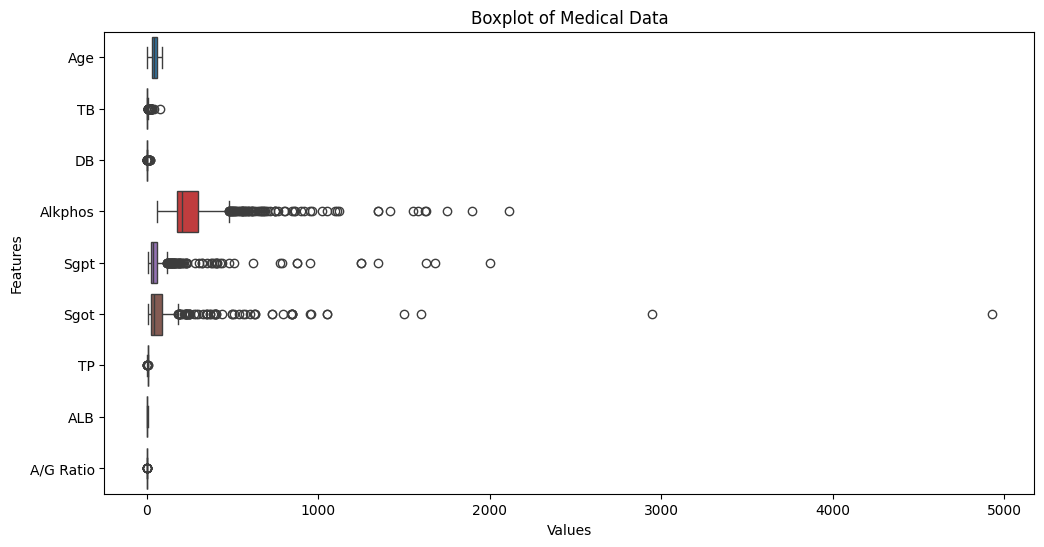

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset.drop(columns=['Gender', 'P_N']), orient='h')
plt.title('Boxplot of Medical Data')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

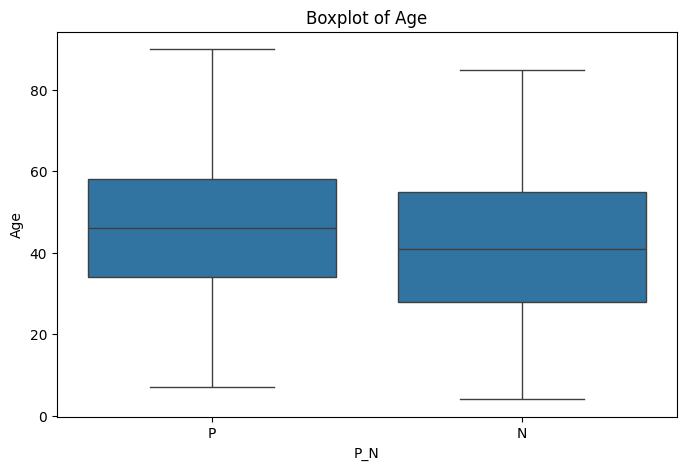

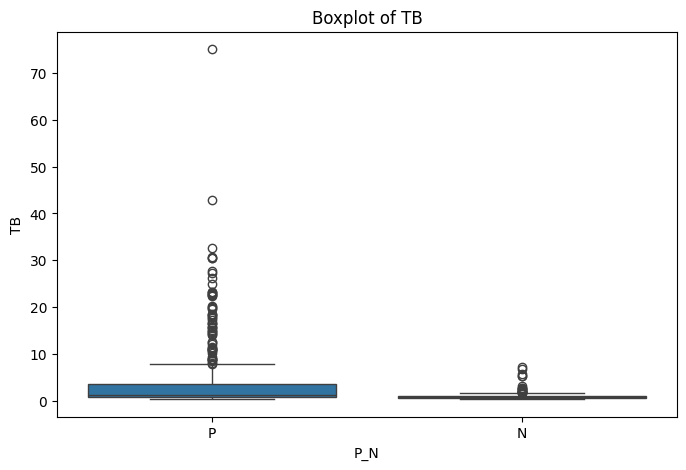

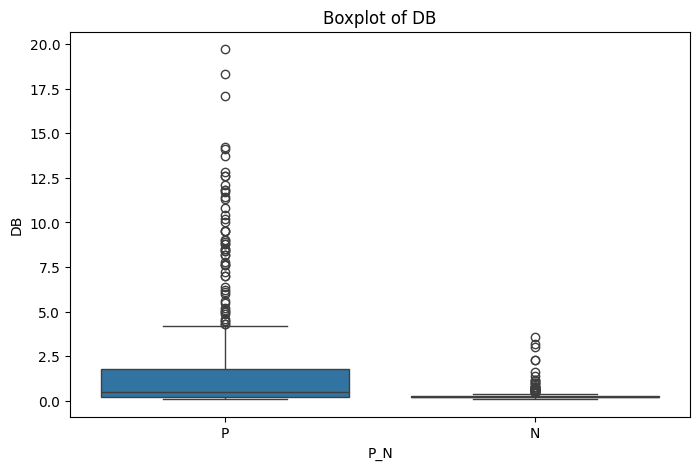

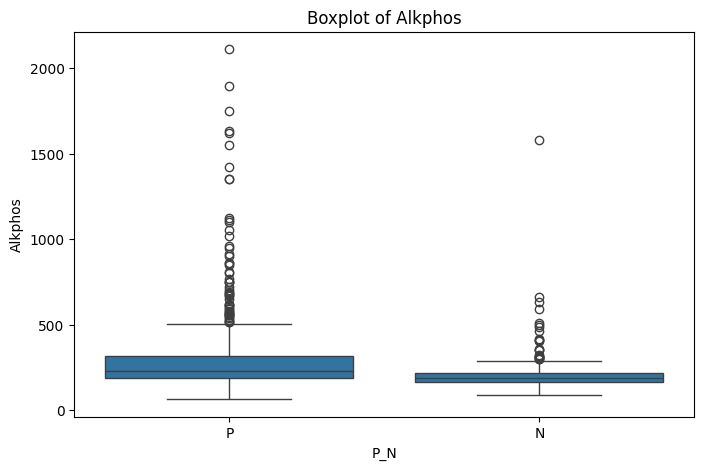

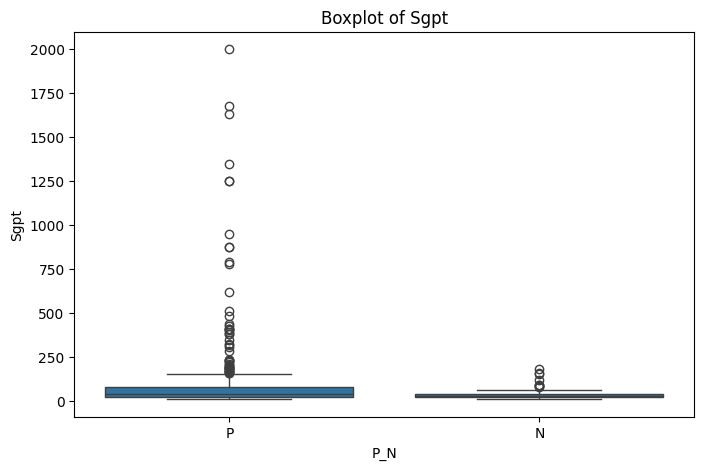

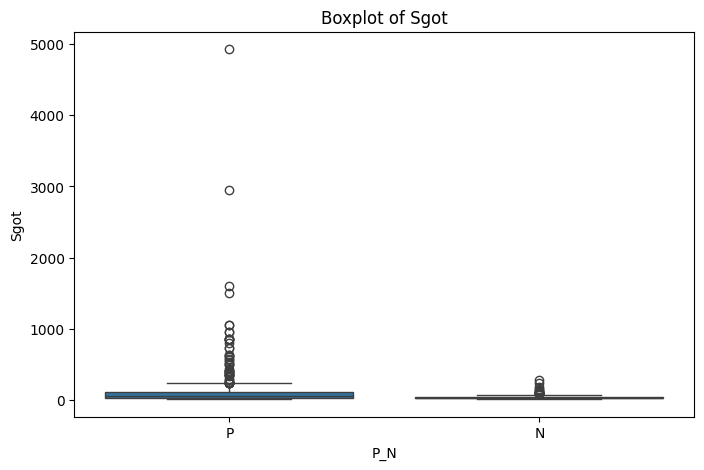

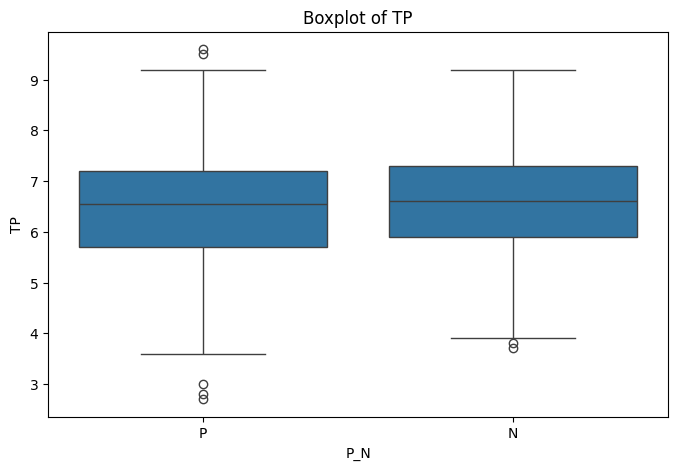

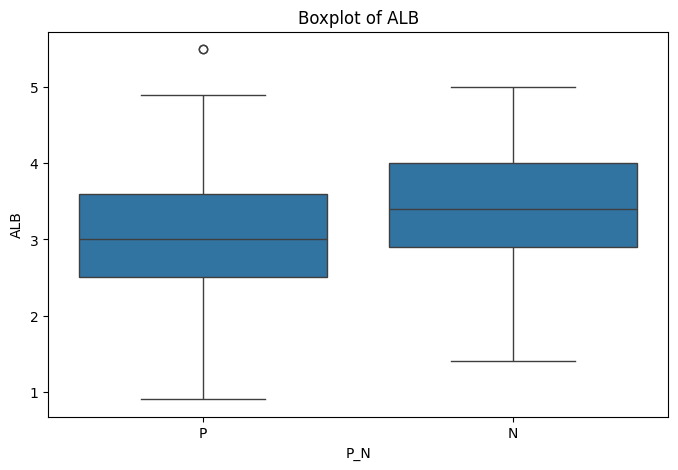

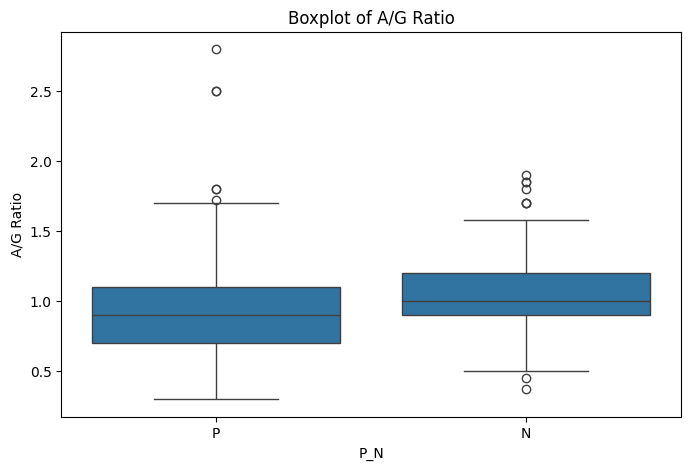

In [ ]:
# Extract numerical columns
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Plot separate boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='P_N', y=column, data=dataset)
    # sns.boxplot(data=dataset, orient='h')
    plt.title(f'Boxplot of {column}')
    plt.xlabel('P_N')
    plt.ylabel(column)
    plt.show()

### Outlier Removal

In [ ]:
dataset=prep_dataset()

Dataset is ready. Here  is a random sample of 3
     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio P_N
129   45    Male  2.8  1.7      263    57    65  5.1  2.3        0.8   P
18    40  Female  0.9  0.3      293   232   245  6.8  3.1        0.8   P
22    62    Male  6.8  3.0      542   116    66  6.4  3.1        0.9   P


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter

# Outlier removal (Replace 'Your_Columns' with the columns containing your numerical data)
numerical_columns = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']
Q1 = dataset[numerical_columns].quantile(0.25)
Q3 = dataset[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
df = dataset[~((dataset[numerical_columns] < (Q1 - 1.5 * IQR)) | (dataset[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Splitting the data into features (X) and target (y)
X = df.drop(columns=['P_N', 'Gender'])  # Assuming 'P_N' and 'Gender' are non-numeric columns
y = df['P_N']

# Splitting the data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Initializing and training the classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

# Making predictions on the validation set
predictions = clf.predict(X_validation)

# Evaluating the model
accuracy = accuracy_score(Y_validation, predictions)
print(f"\nAccuracy Score: {accuracy:.2f}\n")
print(f"Actual Positive and Negative cases: {Counter(Y_validation)}\n")
print("Confusion Matrix:")
df_confusion = pd.DataFrame(confusion_matrix(Y_validation, predictions),
                            index=['P', 'N'],
                            columns=['P', 'N'])
print(df_confusion)


Accuracy Score: 0.65

Actual Positive and Negative cases: Counter({'P': 52, 'N': 27})

Confusion Matrix:
    P   N
P  14  13
N  15  37


In [ ]:
# Calculate the number of rows before outlier removal
rows_before_removal = dataset.shape[0]

# Perform outlier removal using the Interquartile Range (IQR) method
Q1 = dataset[numerical_columns].quantile(0.25)
Q3 = dataset[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = dataset[~((dataset[numerical_columns] < (Q1 - 1.5 * IQR)) | (dataset[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Calculate the number of rows after outlier removal
rows_after_removal = df_cleaned.shape[0]

# Calculate the number of rows removed
rows_removed = rows_before_removal - rows_after_removal

print(f"Number of rows before outlier removal: {rows_before_removal}")
print(f"Number of rows after outlier removal: {rows_after_removal}")
print(f"Number of rows removed: {rows_removed}")


Number of rows before outlier removal: 579
Number of rows after outlier removal: 394
Number of rows removed: 185


---

### Trial of Separate models for male and female dataset

In [ ]:
dataset['Gender'].value_counts()

Gender
Male      439
Female    140
Name: count, dtype: int64

#### Male_data model

In [ ]:
dataset=prep_dataset()

Dataset is ready. Here  is a random sample of 3
     Age Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio P_N
315   22   Male  0.9  0.3      179    18    21  6.7  3.7        1.2   N
366   16   Male  0.7  0.2      418    28    35  7.2  4.1        1.3   N
457   61   Male  0.8  0.2      192    28    35  6.9  3.4        0.9   N


In [ ]:
male_data = dataset[dataset['Gender'] == 'Male']
male_data.sample(3)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,P_N
229,46,Male,0.6,0.2,290,26,21,6.0,3.0,1.0,P
273,30,Male,0.7,0.2,262,15,18,9.6,4.7,1.2,P
85,14,Male,1.4,0.5,269,58,45,6.7,3.9,1.4,P


In [ ]:
array = dataset.values
X_train = array[:,2:10]
y_train = array[:,10]
# Split the data into training and testing sets (e.g., 70% training, 30% testing)
from sklearn.model_selection import train_test_split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
from sklearn import tree
tree_classifier_70_30 = tree.DecisionTreeClassifier()
tree_classifier_70_30.fit(X_train_70, y_train_70)

DecisionTreeClassifier()

In [ ]:
row = randint(0, len(X_test_30) - 1)
print(f'Sample Data:      {X_test_30[row:row+1, :]}')  # Assuming X_test is a NumPy array
print(f'Real Target:      {y_test_30[row:row+1]}')  # Assuming y_test is a NumPy array
result = tree_classifier_70_30.predict(X_test_30[row:row+1, :])  # Assuming X_test is a NumPy array
print(f'Predicted Target: {result}')

Sample Data:      [[0.8 0.2 199 34 31 6.5 3.5 1.16]]
Real Target:      ['N']
Predicted Target: ['N']


In [ ]:
Score = tree_classifier_70_30.score(X_test_30, y_test_30)
print(f"{Score = }")

Score = 0.6666666666666666


#### Female data model

In [ ]:
dataset=prep_dataset()

Dataset is ready. Here  is a random sample of 3
     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio P_N
225   26    Male  0.6  0.2      120    45    51  7.9  4.0        1.0   P
232   50    Male  2.7  1.6      157   149   156  7.9  3.1        0.6   P
430   53  Female  0.7  0.1      182    20    33  4.8  1.9        0.6   P


In [ ]:
female_data = dataset[dataset['Gender'] == 'Female']
female_data.sample(3)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,P_N
302,50,Female,1.7,0.6,430,28,32,6.8,3.5,1.00,P
443,42,Female,0.7,0.2,152,35,81,6.2,3.2,1.06,P
290,45,Female,1.0,0.3,250,48,44,8.6,4.3,1.00,P


In [ ]:
array = dataset.values
X_train = array[:,2:10]
y_train = array[:,10]
# Split the data into training and testing sets (e.g., 70% training, 30% testing)
from sklearn.model_selection import train_test_split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
from sklearn import tree
tree_classifier_70_30 = tree.DecisionTreeClassifier()
tree_classifier_70_30.fit(X_train_70, y_train_70)

DecisionTreeClassifier()

In [ ]:
row = randint(0, len(X_test_30) - 1)
print(f'Sample Data:      {X_test_30[row:row+1, :]}')  # Assuming X_test is a NumPy array
print(f'Real Target:      {y_test_30[row:row+1]}')  # Assuming y_test is a NumPy array
result = tree_classifier_70_30.predict(X_test_30[row:row+1, :])  # Assuming X_test is a NumPy array
print(f'Predicted Target: {result}')

Sample Data:      [[0.7 0.2 237 18 28 5.8 2.5 0.75]]
Real Target:      ['N']
Predicted Target: ['P']


In [ ]:
Score = tree_classifier_70_30.score(X_test_30, y_test_30)
print(f"{Score = }")

Score = 0.6436781609195402


---

### Positive and negative cases parameter plots

In [ ]:
dataset=prep_dataset()

Dataset is ready. Here  is a random sample of 3
     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio P_N
309   48  Female  1.1  0.7      527   178   250  8.0  4.2        1.1   P
571   90    Male  1.1  0.3      215    46   134  6.9  3.0        0.7   P
409   48    Male  5.0  2.6      555   284   190  6.5  3.3        1.0   P


In [ ]:
dataset['P_N'].value_counts()

P_N
P    414
N    165
Name: count, dtype: int64

In [ ]:
positive_data = dataset[dataset['P_N'] == 'P']
positive_data.sample(3)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,P_N
311,54,Female,23.2,12.6,574,43,47,7.2,3.5,0.9,P
217,49,Male,1.1,0.5,159,30,31,7.0,4.3,1.5,P
37,46,Female,14.2,7.8,374,38,77,4.3,2.0,0.8,P


In [ ]:
positive_data.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,46.144928,4.180435,1.931643,319.536232,99.973430,138.173913,6.458696,3.058454,0.914179
std,15.690353,7.158376,3.212534,268.844496,213.216942,338.136237,1.097282,0.787409,0.326153
min,7.000000,0.400000,0.100000,63.000000,12.000000,11.000000,2.700000,0.900000,0.300000
25%,34.000000,0.800000,0.200000,186.000000,25.000000,29.250000,5.700000,2.500000,0.700000
50%,46.000000,1.400000,0.500000,229.000000,41.000000,53.000000,6.550000,3.000000,0.900000
75%,58.000000,3.675000,1.800000,315.750000,77.500000,110.250000,7.200000,3.600000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [ ]:
negative_data = dataset[dataset['P_N'] == 'N']
negative_data.sample(3)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,P_N
423,53,Male,1.6,0.9,178,44,59,6.5,3.9,1.50,N
444,61,Male,0.8,0.2,163,18,19,6.3,2.8,0.80,N
202,38,Female,0.8,0.2,145,19,23,6.1,3.1,1.03,N


In [ ]:
negative_data.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,41.363636,1.144848,0.396364,220.684848,33.836364,40.763636,6.539394,3.339394,1.029576
std,17.059112,1.009613,0.521944,141.527805,25.146229,36.563158,1.053316,0.778577,0.287252
min,4.000000,0.500000,0.100000,90.000000,10.000000,10.000000,3.700000,1.400000,0.370000
25%,28.000000,0.700000,0.200000,162.000000,20.000000,21.000000,5.900000,2.900000,0.900000
50%,41.000000,0.800000,0.200000,187.000000,28.000000,29.000000,6.600000,3.400000,1.000000
75%,55.000000,1.100000,0.300000,215.000000,38.000000,43.000000,7.300000,4.000000,1.200000
max,85.000000,7.300000,3.600000,1580.000000,181.000000,285.000000,9.200000,5.000000,1.900000


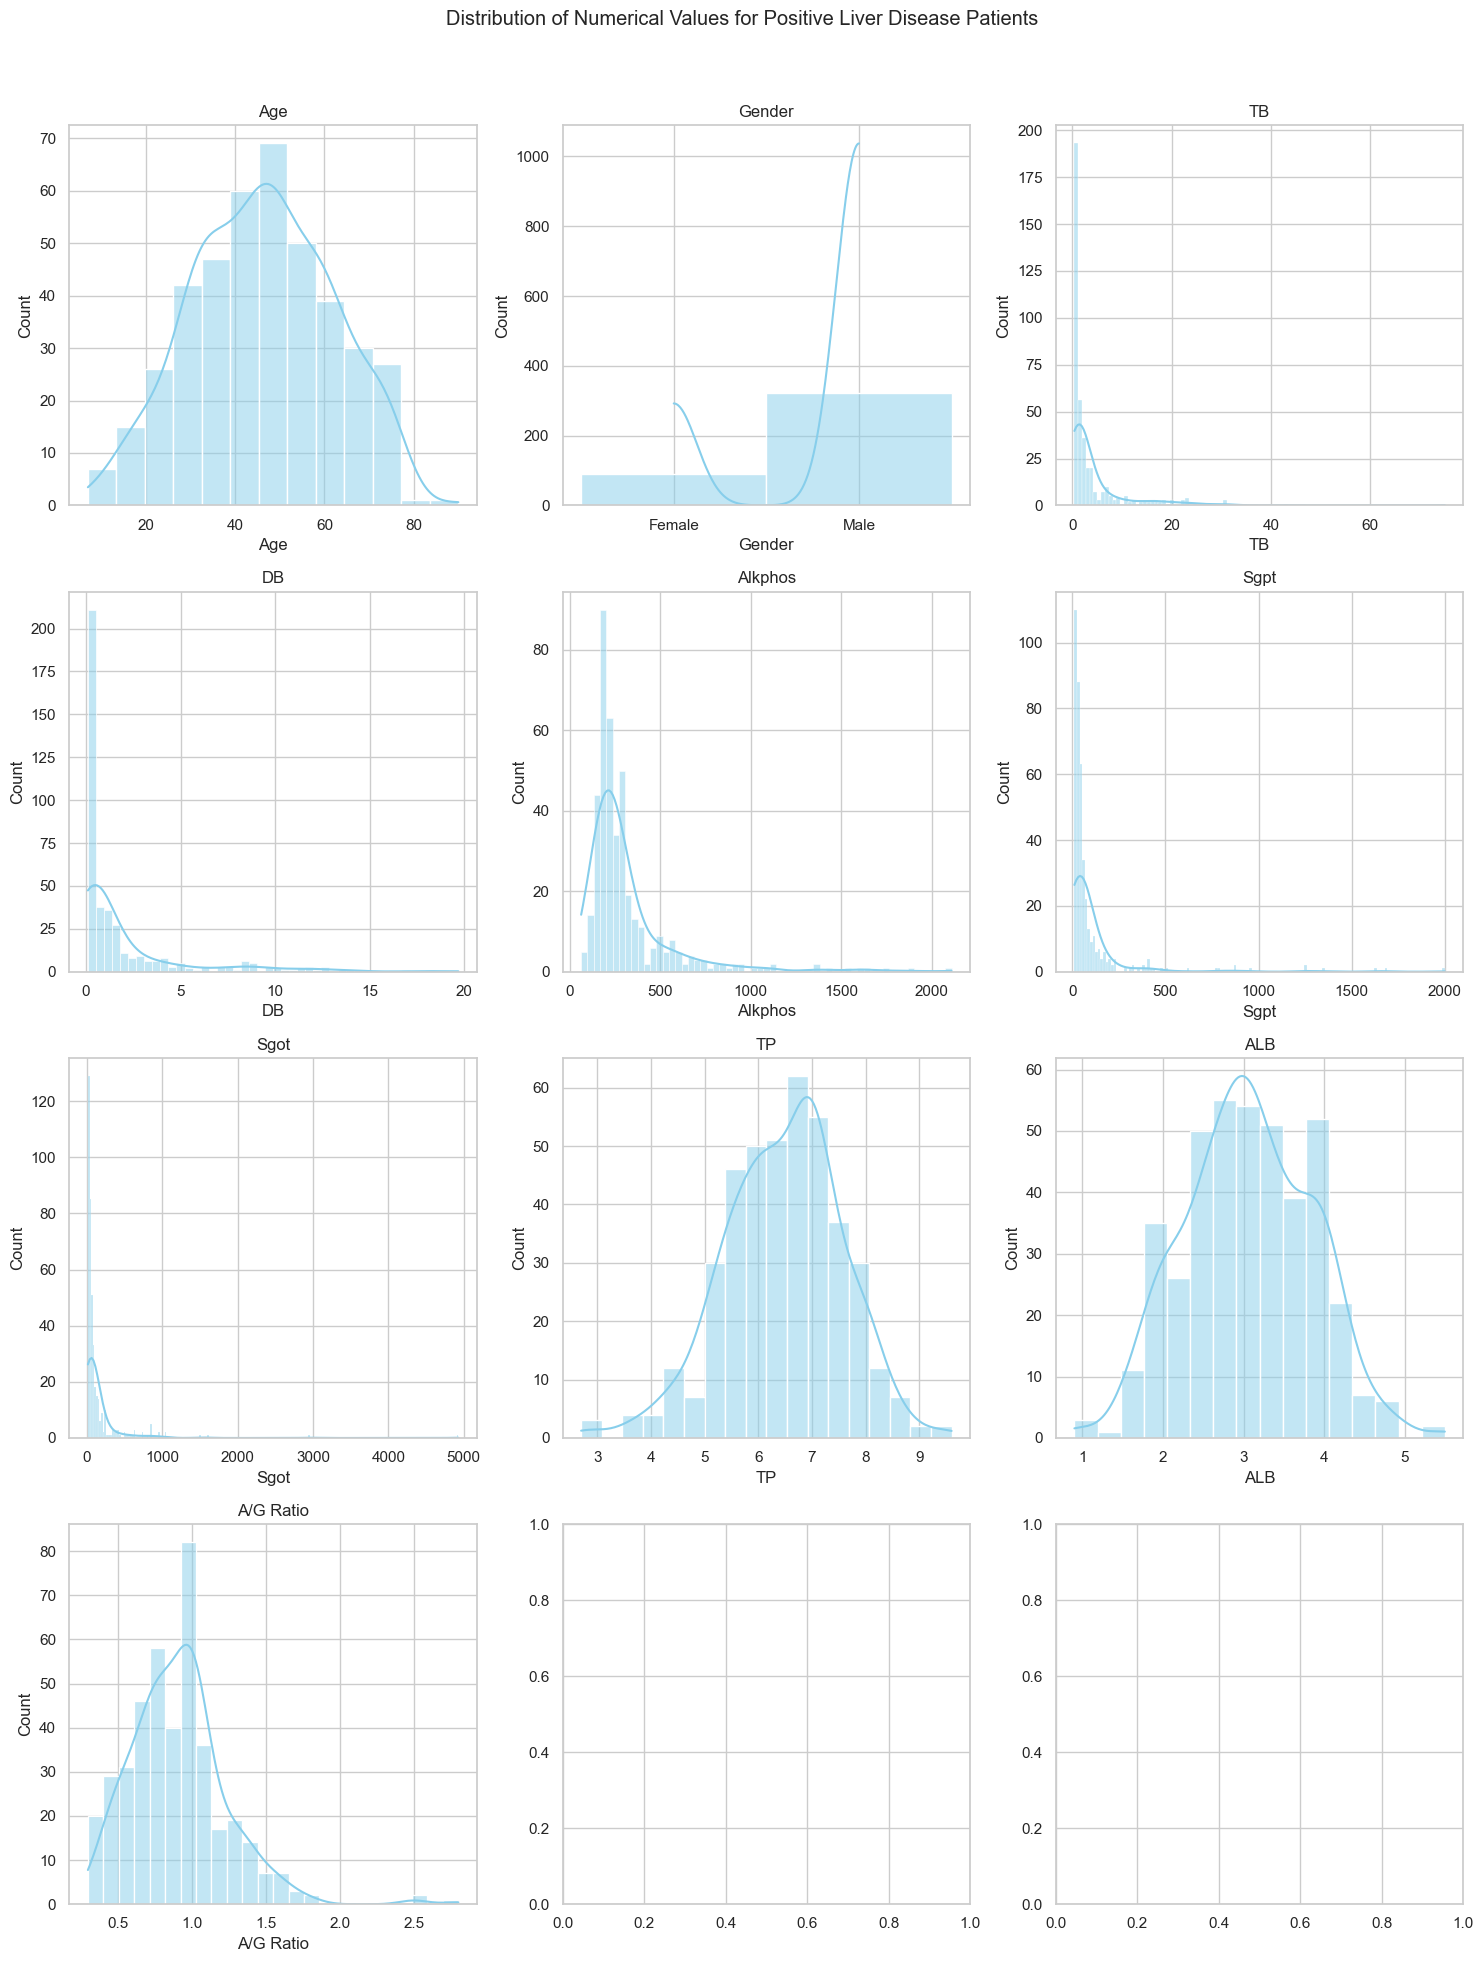

In [ ]:
sns.set_theme(style="whitegrid")

# Determine the number of rows and columns dynamically
num_numerical_cols = len(positive_data.columns) - 1  # Exclude the last column (P_N)
num_rows = (num_numerical_cols - 1) // 3 + 1
num_cols = min(num_numerical_cols, 3)

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Distribution of Numerical Values for Positive Liver Disease Patients')

# Plot histograms for each numerical column
for i, column in enumerate(positive_data.columns[:-1]):  # Exclude the last column (P_N)
    row, col = i // num_cols, i % num_cols
    sns.histplot(data=positive_data, x=column, kde=True, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

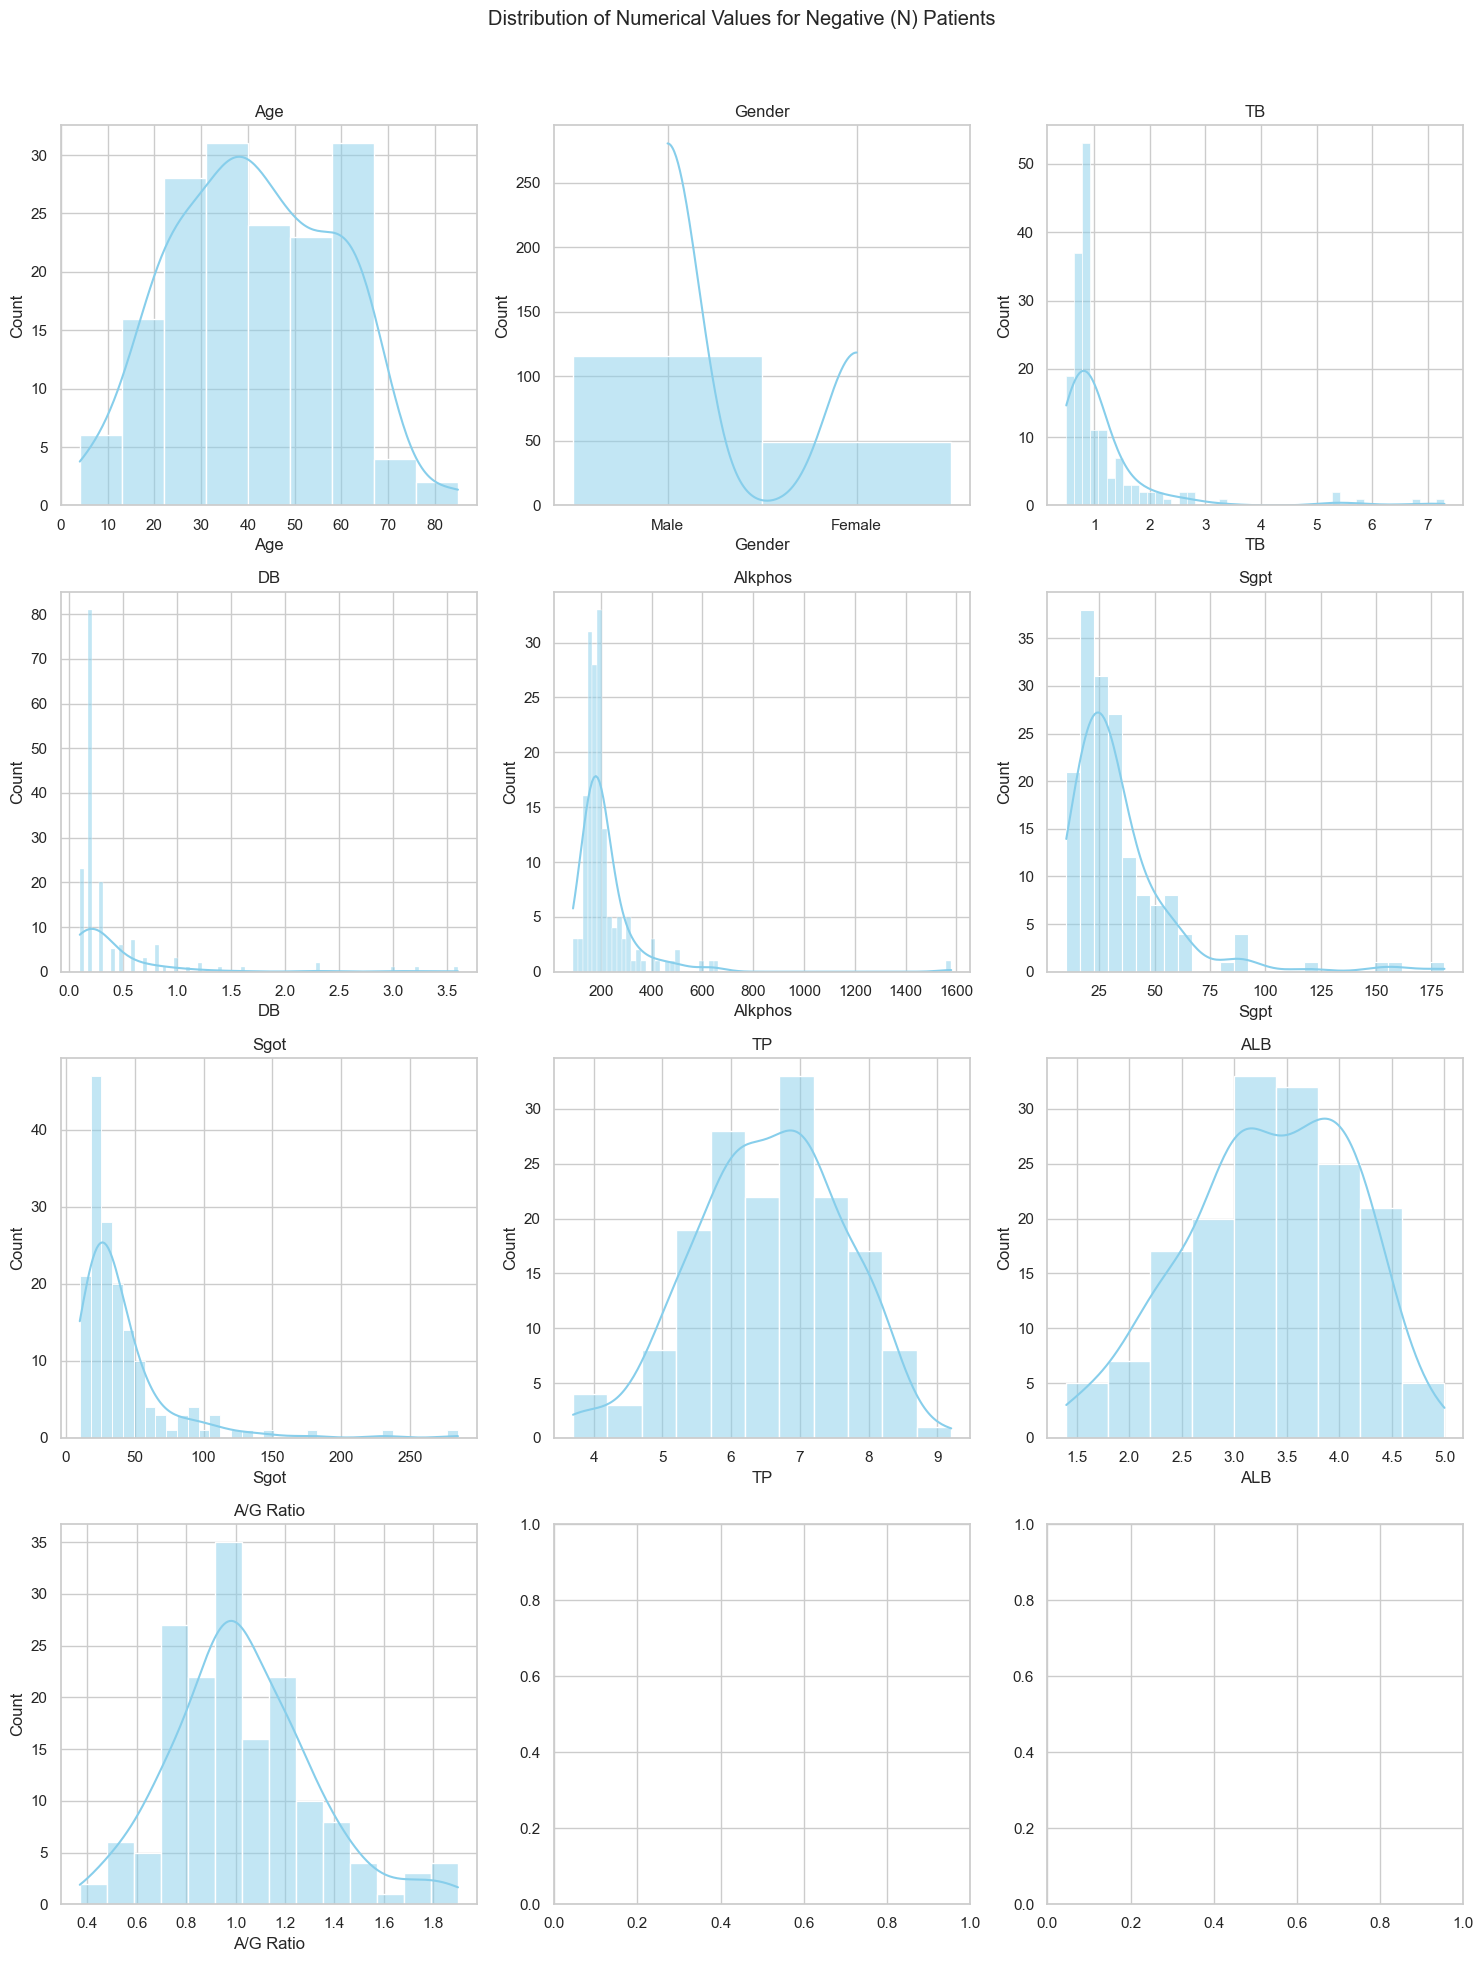

In [ ]:
sns.set_theme(style="whitegrid")

# Determine the number of rows and columns dynamically
num_numerical_cols = len(negative_data.columns) - 1  # Exclude the last column (P_N)
num_rows = (num_numerical_cols - 1) // 3 + 1
num_cols = min(num_numerical_cols, 3)

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Distribution of Numerical Values for Negative (N) Patients')

# Plot histograms for each numerical column
for i, column in enumerate(negative_data.columns[:-1]):  # Exclude the last column (P_N)
    row, col = i // num_cols, i % num_cols
    sns.histplot(data=negative_data, x=column, kde=True, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

---

### Side by side plots

In [ ]:
dataset=prep_dataset()

Dataset is ready. Here  is a random sample of 3
     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio P_N
403   65    Male  0.7  0.2      199    19    22  6.3  3.6        1.3   N
188   60    Male  1.9  0.8      614    42    38  4.5  1.8        0.6   P
549   40  Female  2.1  1.0      768    74   141  7.8  4.9        1.6   P


In [ ]:
def side_by_side(dataset, column_name):
    # Set the theme for seaborn
    sns.set_theme(style="whitegrid")

    # Create a FacetGrid for side-by-side plots
    g = sns.FacetGrid(dataset, col="P_N", height=6, aspect=1.2, col_wrap=2)
    g.map(sns.histplot, column_name, kde=True, color='skyblue')
    g.set_axis_labels(column_name, "Count")
    g.set_titles("{col_name} Cases")

    plt.suptitle(f'Distribution of {column_name} for Positive and Negative Liver Disease Patients', y=1.02)
    plt.show()

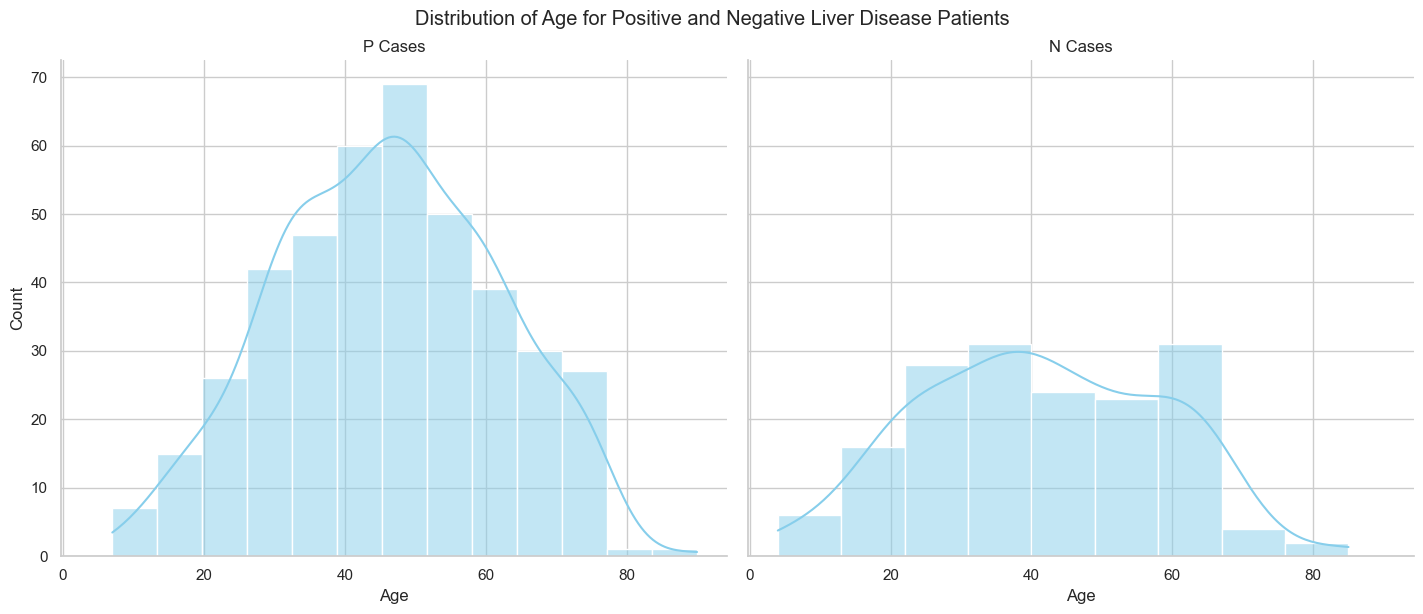

In [ ]:
side_by_side(dataset, 'Age')

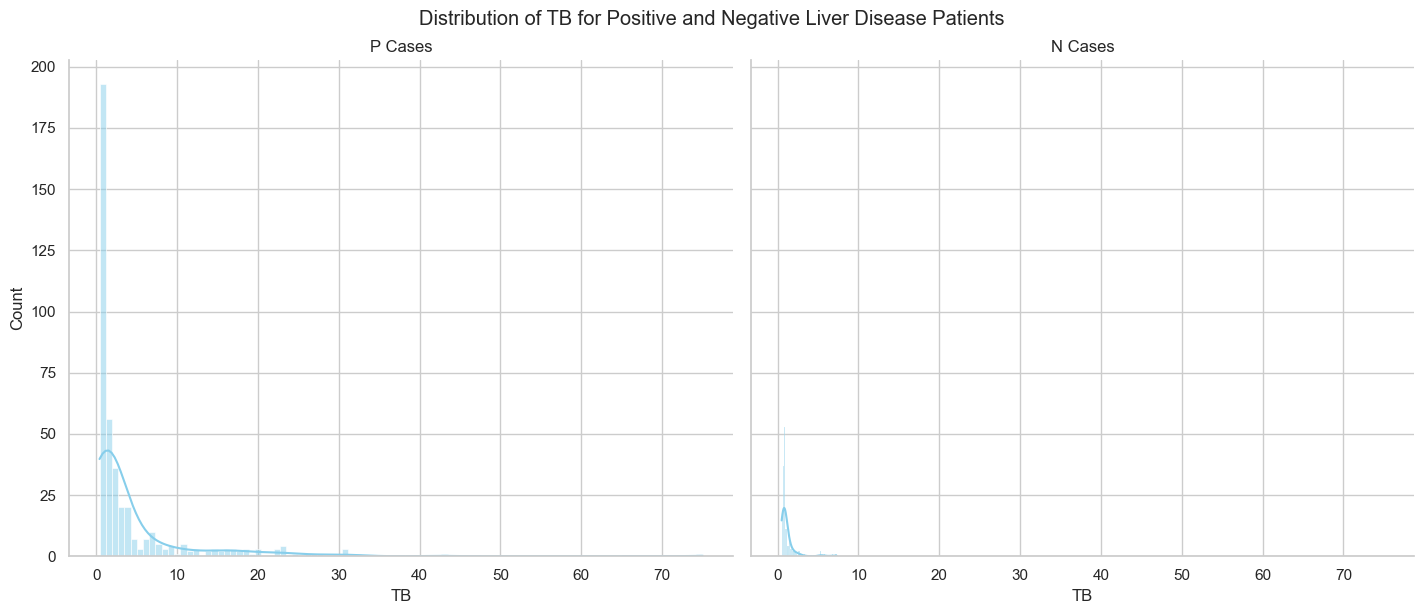

In [ ]:
side_by_side(dataset, 'TB')

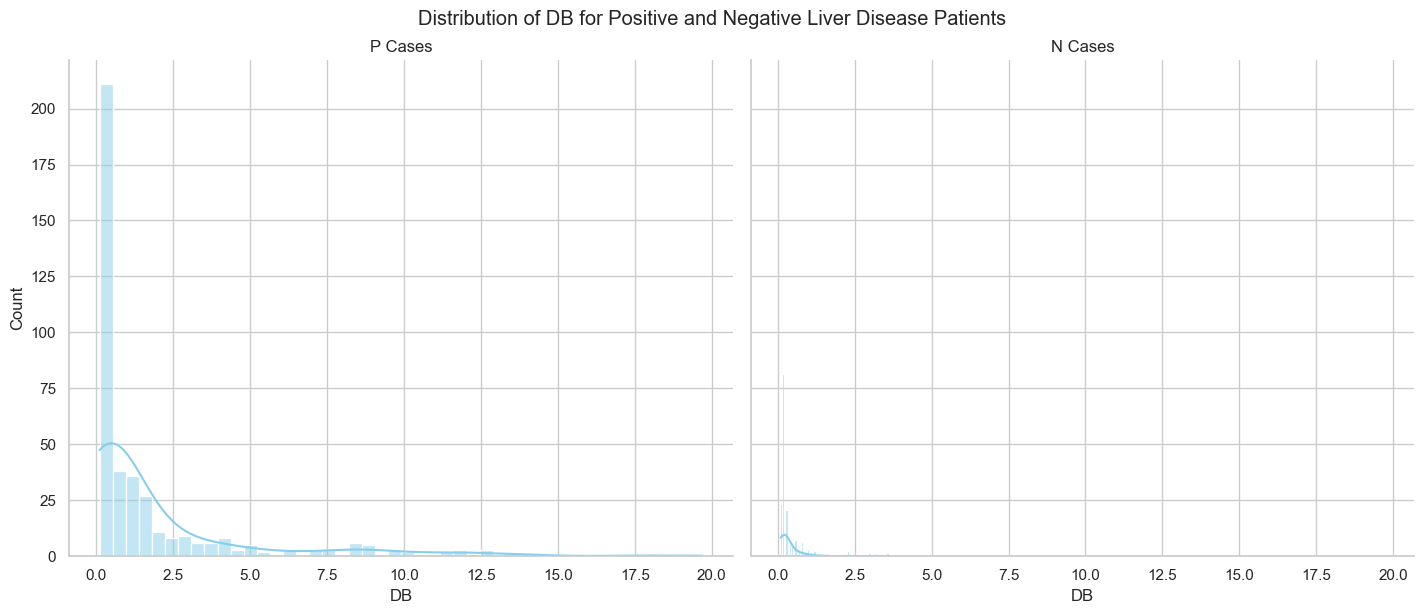

In [ ]:
side_by_side(dataset, 'DB')

In [ ]:
side_by_side(dataset, 'Age')

---

1. Age:For positive cases, the mean age is higher (46.14) compared to negative cases (41.36).
The range of ages for positive cases is wider (7 to 90) compared to negative cases (4 to 85).
2. TB (Total Bilirubin):The mean TB is higher for positive cases (4.18) compared to negative cases (1.15).
The maximum TB value is substantially higher for positive cases (75.00) compared to negative cases (7.30).
3. DB (Direct Bilirubin):Similar to TB, the mean DB is higher for positive cases (1.93) compared to negative cases (0.40).The maximum DB value is higher for positive cases (19.70) compared to negative cases (3.60).
4. Alkphos (Alkaline Phosphotase):The mean Alkphos level is higher for positive cases (319.54) compared to negative cases (220.68).
5. Sgpt (Alamine Aminotransferase):The mean Sgpt level is higher for positive cases (99.97) compared to negative cases (33.84).
6. Sgot (Aspartate Aminotransferase):The mean Sgot level is higher for positive cases (138.17) compared to negative cases (40.76).
7. TP (Total Proteins):The mean TP level is slightly higher for positive cases (6.46) compared to negative cases (6.54).
8. ALB (Albumin):The mean ALB level is lower for positive cases (3.06) compared to negative cases (3.34).
9. A/G Ratio (Albumin/Globulin Ratio):The mean A/G Ratio is lower for positive cases (0.91) compared to negative cases (1.03).

General Observations:

1. Overall, positive cases tend to have higher levels of bilirubin, alkaline phosphatase, and liver enzymes (Sgpt and Sgot) compared to negative cases.
2. The albumin levels are slightly lower in positive cases, indicating a potential impact on liver function.
3. Age appears to be higher on average for positive cases.

### Problems we faced and weaknesses in the model:

1. How to combine 7 features for better accuracy ? Dilemma of running all the combinations of the parameters or simply combining all to train and test the model.
2. No clear-cut formula linking all 7 parameters to predict P or N classification.
3. Not knowing what we don't know: There are certain edge cases in medical diagnosis where patients may have positive markers for liver disease in our model. However due to underlying medical conditions it is normal for the patient and is healthy otherwise.

### Summary

|Model|Score|
|-----|-----|
|Male Only| 0.666|
|Female Only| 0.6436|
|Combined| 0.6609|
|After outlier removal|0.65|

1. Did not require much preprocessing. Only 4 NaN rows were dropped.
2. Weighted training can give more weightage to the female data and increase accuracy. But we chose to stick to what was taught in class.
3. Outlier removal decreased accuracy

Peer Suggestions:
- Add Precision and recall

### References

Dataset Source: https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset